In [1]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
print(tf.__version__)

2.0.0


In [2]:
df=pd.read_csv("Churn_Modelling.csv")
df.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [4]:
df1=df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)
df1.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1['Geography']=le.fit_transform(df1['Geography'])
df1['Gender']=le.fit_transform(df1['Gender'])

In [6]:
df1.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [7]:
## checking for null value / if nullpresent fill it / IQR / Corrlation matrix 

In [8]:
X=df1[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance','NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
y=df1['Exited']

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y)

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

In [12]:
X_train.shape

(8000, 10)

## we are building the  model of ANN 

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D,ZeroPadding2D,BatchNormalization
from tensorflow.keras.layers import ReLU

In [14]:
classifier=Sequential()

In [15]:
# Adding the input layer with 3 hidden  layer
classifier.add(Dense(50, input_shape=(10,), activation='relu')) ## 50 hidden neuron / input_shape is X features 
classifier.add(Dropout(0.25))

classifier.add(Dense(20, activation='relu'))
classifier.add(Dropout(0.25))

# Adding the output layer
classifier.add(Dense(1, activation='sigmoid'))  ## output is Binary and 1 column 


In [16]:
## when output is 0 and 1 we should use 'binary_crossentropy' and when 0,1,2 ,3 we shoukd use categorical cross entropy
classifier.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
model_history=classifier.fit(X_train, y_train, batch_size=32, epochs=50,validation_split=0.33)

Train on 5359 samples, validate on 2641 samples
Epoch 1/50
5359/5359 [==============================] - 16s 3ms/sample - loss: 0.5349 - accuracy: 0.7449 - val_loss: 0.4352 - val_accuracy: 0.8088
Epoch 2/50
5359/5359 [==============================] - 1s 234us/sample - loss: 0.4566 - accuracy: 0.8015 - val_loss: 0.4163 - val_accuracy: 0.8217
Epoch 3/50
5359/5359 [==============================] - 1s 242us/sample - loss: 0.4412 - accuracy: 0.8091 - val_loss: 0.4069 - val_accuracy: 0.8311
Epoch 4/50
5359/5359 [==============================] - 1s 243us/sample - loss: 0.4281 - accuracy: 0.8194 - val_loss: 0.3984 - val_accuracy: 0.8357
Epoch 5/50
5359/5359 [==============================] - 1s 207us/sample - loss: 0.4211 - accuracy: 0.8268 - val_loss: 0.3880 - val_accuracy: 0.8432
Epoch 6/50
5359/5359 [==============================] - 1s 231us/sample - loss: 0.4072 - accuracy: 0.8294 - val_loss: 0.3779 - val_accuracy: 0.8493
Epoch 7/50
5359/5359 [==============================] - 1s 260us/

In [43]:
classifier.evaluate(X_test,y_test)

2000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3561885929107666, 0.853]

In [44]:
classifier.predict(X_test)

array([[0.23461509],
       [0.00371739],
       [0.00085911],
       ...,
       [0.00988474],
       [0.27905262],
       [0.01289323]], dtype=float32)

In [45]:
y_predict=classifier.predict(X_test)

In [46]:
## classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                550       
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                1020      
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 1,591
Trainable params: 1,591
Non-trainable params: 0
_________________________________________________________________


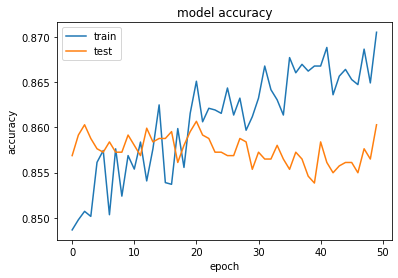

In [47]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

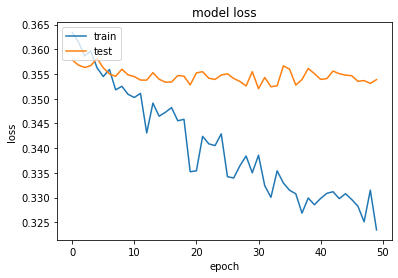

In [49]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [50]:
pred_y = classifier.predict(X_test)
y_pred = (pred_y > 0.5)

In [51]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1542,   51],
       [ 243,  164]], dtype=int64)

In [52]:
from sklearn.metrics import classification_report
score=classification_report(y_test,y_pred)
print(score)

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1593
           1       0.76      0.40      0.53       407

    accuracy                           0.85      2000
   macro avg       0.81      0.69      0.72      2000
weighted avg       0.84      0.85      0.83      2000

